In [136]:
import os
files = dict()
dirr = "/mnt/permanent/Home/nessie/velkey/data/szeged_morph_disambig_corp/"
for filename in os.listdir(dirr):
    files[filename] = [line.rstrip('\n') for line in open(dirr + filename)]
for file in files:
    print(len(files[file]))

137745
28196
70671
53416
106461
101216
236813
70244
105001
82716
154186
81213
68582
161539
128769


In [50]:
sentences = [[]]
for file in files:
    data = files[file]
    for line in data:
        if line == "":
            sentences.append([])
        else:
            word = line.split("\t")[6]
            word = word.replace(" ","|")
            sentences[-1].append(word)
            
sentences.remove([])

In [79]:
data_with_labels = []
for sent in sentences:
    if '' in sent:
        sent.remove('')
    string = " ".join(sent)
    label = []
    for i in range(len(string)):
        if string[i] != "|":
            label.append(1 if string[i-1] == "|" else 0)
    string = string.replace("|","")
    if len(label) != len(string):
        print(len(label), len(string))
    data_with_labels.append((string, label))

sentence count:  81967
avg len:  107.291092757
variance:  80.5284544456


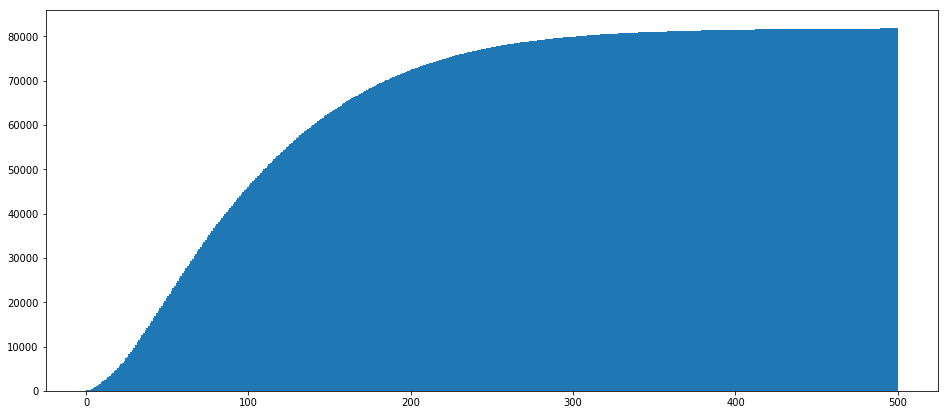

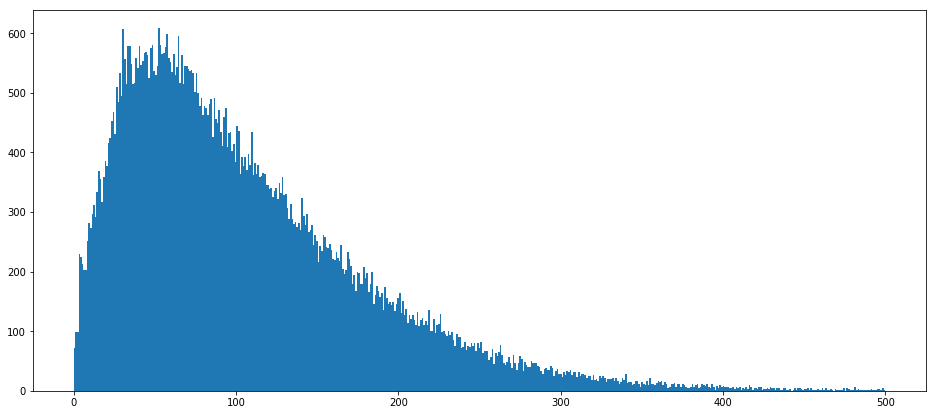

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(16, 7)
lens = [len(sent[0]) for sent in data_with_labels]
print("sentence count: ", len(lens))
print("avg len: ", np.average(lens))
print("variance: ", np.std(lens))

bins = np.linspace(0, 500, 500)

n, bins, patches = plt.hist(lens, bins, cumulative=True)
plt.show()
n, bins, patches = plt.hist(lens, bins, cumulative=False)
plt.show()


# Create datasets


In [141]:
from random import shuffle
shuffle(data_with_labels)
shuffled = data_with_labels
train = shuffled[:int(0.9*len(shuffled))]
test = shuffled[int(0.9*len(shuffled)):int(0.95*len(shuffled))]
validation = shuffled[int(0.95*len(shuffled)):]

crop = 500
outdir = "/mnt/permanent/Home/nessie/velkey/data/"

def list_to_str(lista):
    string =""
    for item in lista:
        string += str(item)
    return string

with open(outdir + "train", 'w') as f:
    for data in train:
        if crop >= len(data):
            f.write(str(data[0] + '\t' + list_to_str(data[1]) + '\n'))
            
with open(outdir + "test", 'w') as f:
    for data in test:
        if crop >= len(data):
            f.write(str(data[0] + '\t' + list_to_str(data[1]) + '\n'))
            
with open(outdir + "validation", 'w') as f:
    for data in validation:
        if crop >= len(data):
            f.write(str(data[0] + '\t' + list_to_str(data[1]) + '\n'))
            
with open(outdir + "vocabulary", 'w') as f:
    chars = set()
    for s in data_with_labels:
        for char in s[0]:
            chars.add(char)
    f.write(''.join(sorted(list(chars))))
    

# Label analysis

In [140]:
count = 0
summed = 0
for sent in data_with_labels:
    count += len(sent[1])
    summed += sum(sent[1])
    
print("Zero fraction in labels: ", (1-(summed/count))*100, "%")

Zero fraction in labels:  91.27552539824244 %
